In [1]:
from sklearn import datasets
digits = datasets.load_digits()
%matplotlib inline

In [2]:
images_and_labels = list(zip(digits.images,digits.target))

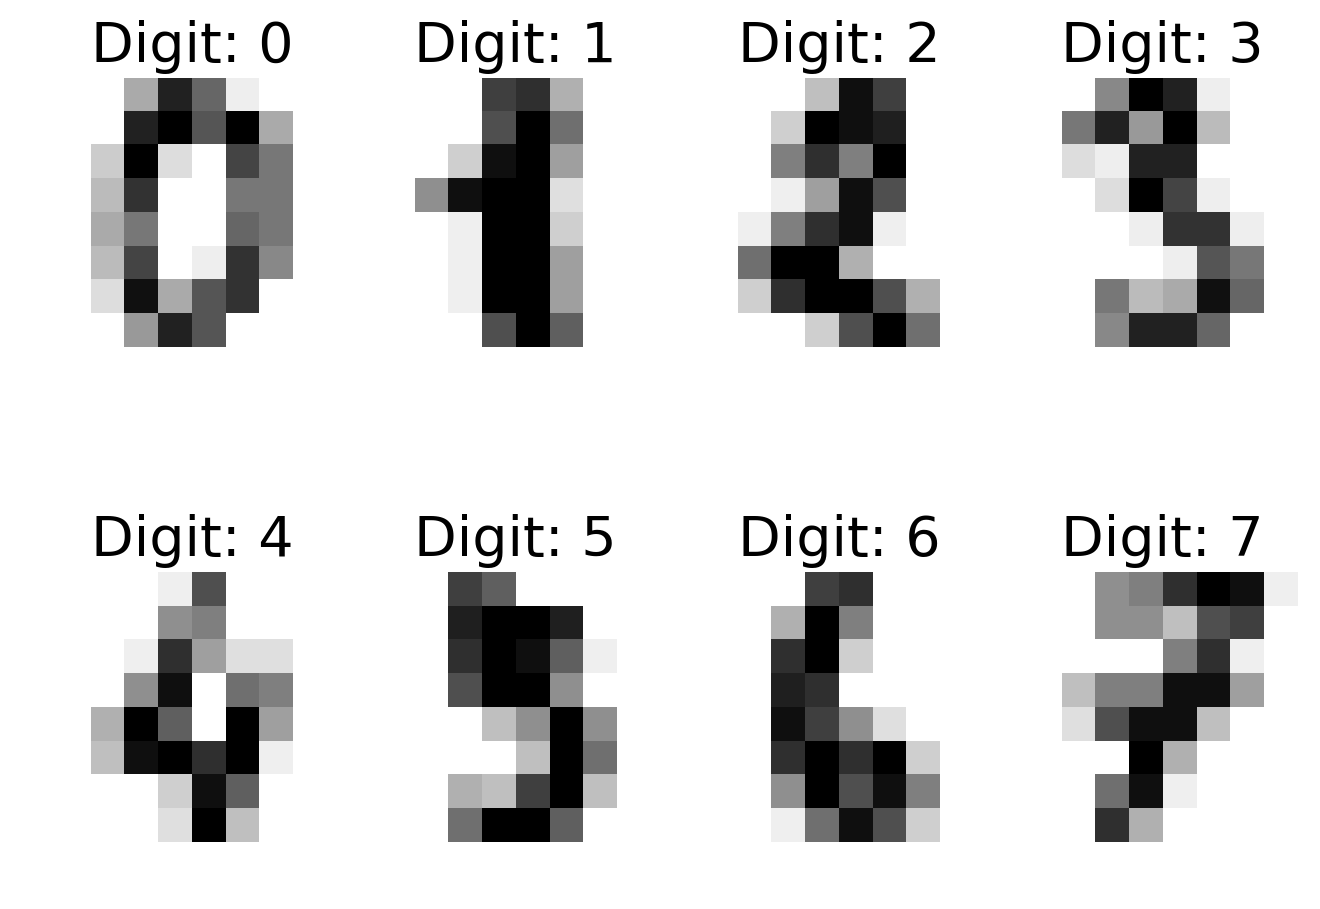

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6),dpi=200)
for index,(image,label) in enumerate(images_and_labels[:8]):
    plt.subplot(2,4,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Digit: {}'.format(label),fontsize=20)

In [4]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain,Ytest = train_test_split(digits.data,digits.target,test_size=0.2,random_state=2)

D:\Code\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn import svm
clf = svm.SVC(gamma=0.001,C=100.)
clf.fit(Xtrain,Ytrain)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
Ypred = clf.predict(Xtest)
clf.score(Xtest,Ytest)

0.9777777777777777

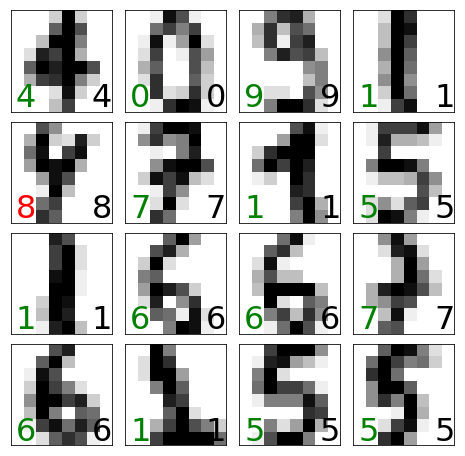

In [12]:
fig, axes = plt.subplots(4,4,figsize=(8,8))
fig.subplots_adjust(hspace=0.1,wspace=0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8,8),cmap=plt.cm.gray_r,interpolation='nearest')
    ax.text(0.05,0.05,str(Ypred[i]),fontsize=32,transform=ax.transAxes,color="green" if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8,0.05,str(Ypred[i]),fontsize=32,transform=ax.transAxes,color="black")
    ax.set_xticks([])
    ax.set_yticks([])